# SOCIAL NETWORK ANALYSIS ON FACEBOOK DATA
## by - G SAI PRABHAT(190330074)

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Centrality
Centrality originally referred to how central actors are in a network’s structure. It has become abstracted as a term from its 
topological origins and now refers very generally to how important actors are to a network.

### Degree Centrality
The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number 
of connections a particular node has in the network. It is based on the fact that important nodes have many connections. 

### Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the 
geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest 
chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the 
communication/information flow within the network. The nodes with high betweenness centrality can have a strategic control and 
influence on others.

### Closeness centrality 
Closeness centrality we again make use of the shortest paths between nodes. We measure the distance between two nodes as the 
length of the shortest path between them.indicates how close a node is to all other nodes in the network. It is calculated as 
the average of the shortest path length from the node to every other node in the network.

### EigenVector Centrality
Eigenvector centrality is a measure of the influence of a node in a network.
Eigenvector centrality is a more sophisticated view of centrality: 
    A person with few connections could have a very high eigenvector centrality if those few connections are highly valued.
Eigenvector centrality is a measure of exactly this. It decides that a node is important if it is connected to other important nodes. We can use the eigenvector_centrality() function of NetworkX to calculate eigenvector centrality of all the nodes in a network.

----------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("facebook_combined.txt")
df

,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6
...,...
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038


In [9]:
df.isnull().sum()

0 1    0
dtype: int64

In [10]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [7]:
import networkx as nx
Grp1=nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(), nodetype=int)
print(nx.info(Grp1))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


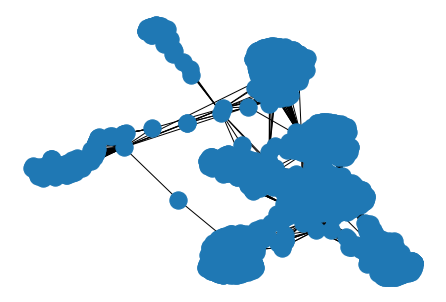

In [8]:
nx.draw(Grp1)

### Finding the neighbors for selected nodes 

Let's find the neighbors for these nodes {1,15,35,75,150,300,375,898}

In [9]:
neigh=[1,15,35,75,150,300,375,898]
for i in range(len(neigh)):
    all_neighbors=list(nx.classes.funtion.all_neighbors(Grp1,neigh[i]))
    print("Neighbors for this node ",str(neigh[i]),"--->",str(all_neighbors))

AttributeError: module 'networkx.classes' has no attribute 'funtion'

### Finding the shortest path for selected nodes

Let's find the shortest path between these nodes

In [11]:
sources = [20,40,65,75]
targets = [650,802,920,1010] 
for i in range(4):
    path = nx.shortest_path(Grp1,source=sources[i],target=targets[i])
    length = nx.shortest_path_length(Grp1,source=sources[i],target=targets[i],method='dijkstra')
    print("Shortest Path between these Nodes ", str(sources[i])," ---> ", str(targets[i]), " is ",
          str(path), " ,Length = ", str(length))

Shortest Path between these Nodes  20  --->  650  is  [20, 0, 34, 414, 650]  ,Length =  4
Shortest Path between these Nodes  40  --->  802  is  [40, 0, 58, 1684, 860, 698, 686, 802]  ,Length =  7
Shortest Path between these Nodes  65  --->  920  is  [65, 0, 107, 920]  ,Length =  3
Shortest Path between these Nodes  75  --->  1010  is  [75, 0, 107, 1010]  ,Length =  3


### Using Betweenness Centrality to identify the most visited node 

[107, 1684, 3437, 1912, 1085]

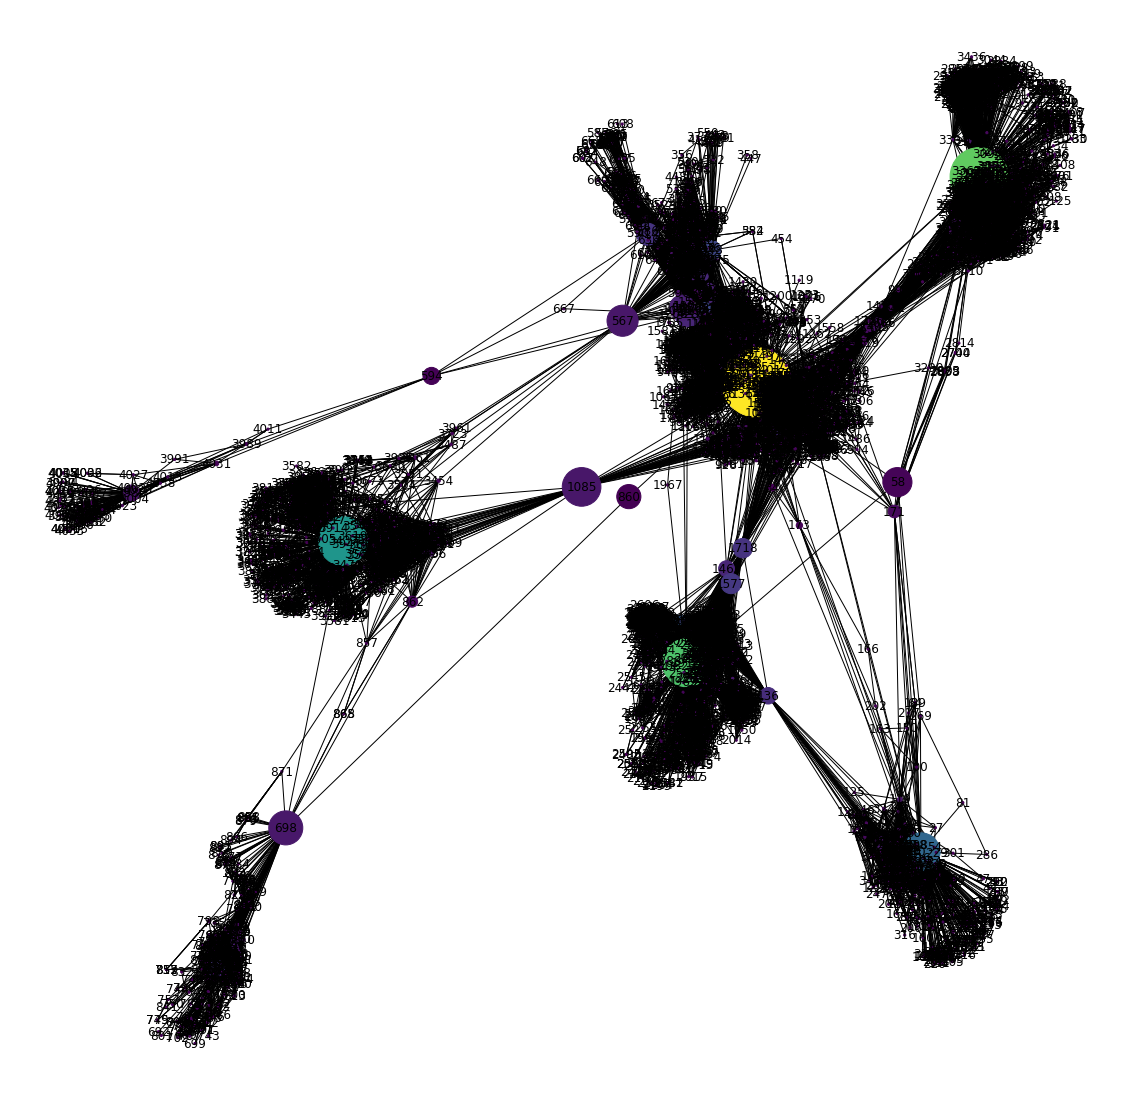

In [13]:
pos=nx.spring_layout(Grp1)
betCent=nx.betweenness_centrality(Grp1, normalized=True, endpoints=True)
node_color=[20000.0*Grp1.degree(v) for v in Grp1]
node_size=[v*10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(Grp1, pos=pos, with_lables=False,node_color=node_color,node_size=node_size)
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

The Nodes acting as a betweenness Centrality are -

In [16]:
sorted(betCent,key=betCent.get,reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

### Using Degree Centrality to identify nodes with highest degrees 

[107, 1684, 1912, 3437, 0]

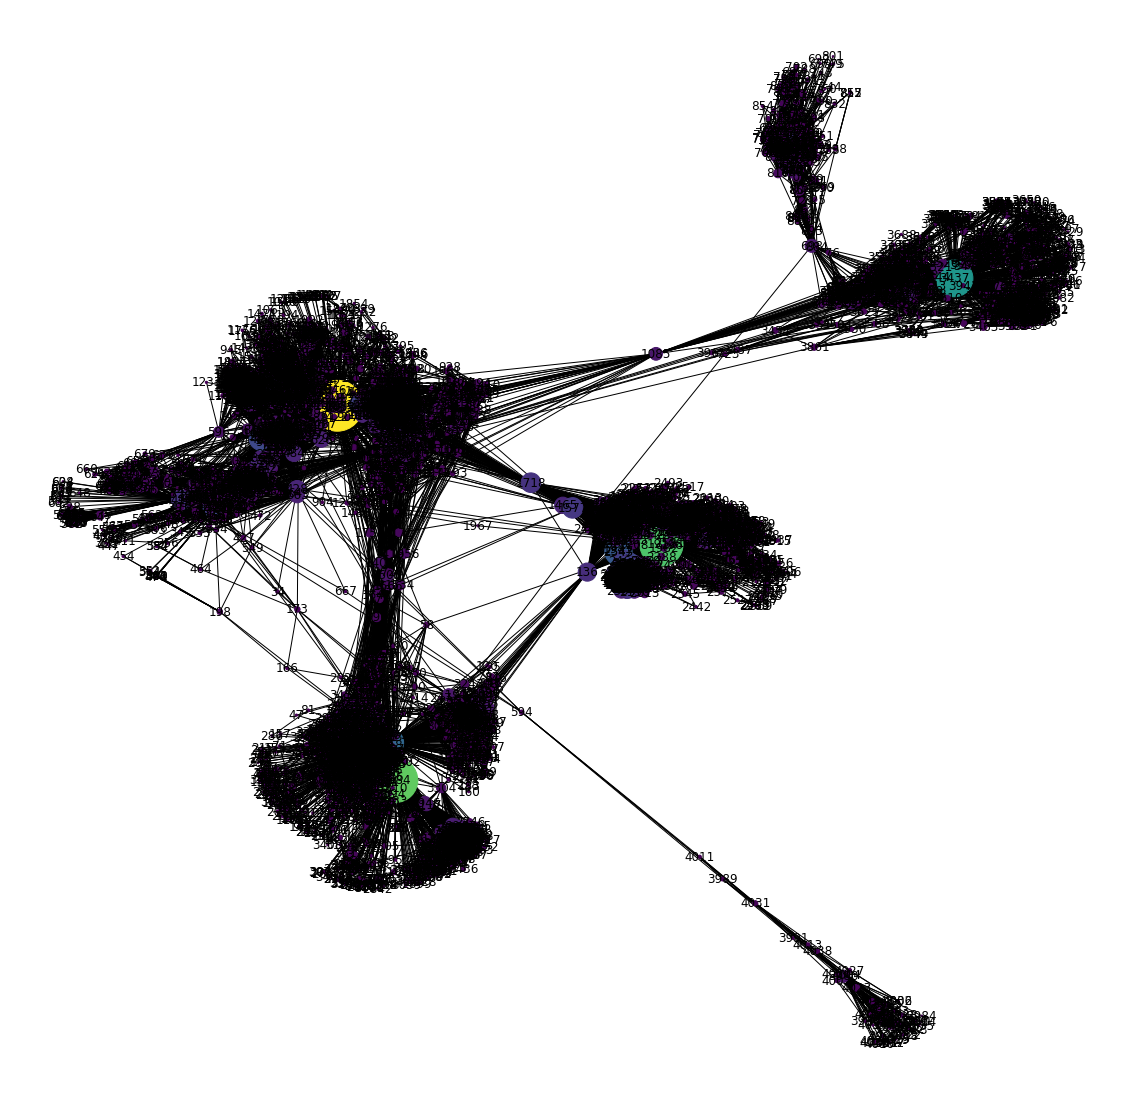

In [15]:
pos=nx.spring_layout(Grp1)
degCent=nx.degree_centrality(Grp1)
node_color=[20000.0*Grp1.degree(v) for v in Grp1]
node_size=[v*10000 for v in degCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(Grp1, pos=pos, with_lables=False,node_color=node_color,node_size=node_size)
plt.axis('off')
sorted(degCent, key=degCent.get, reverse=True)[:5]

The Nodes having highest degree Centrality are - 

In [17]:
sorted(degCent,key=degCent.get,reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

Finding node with maximum degree

In [24]:
max(x for x,y in nx.degree(Grp1))

4038

Counting degree nodes: No of nodes with same degree

In [25]:
d= dict(Grp1.degree()).values()
from collections import Counter
Counter(d)

Counter({347: 1,
         17: 76,
         10: 95,
         13: 79,
         6: 98,
         20: 63,
         8: 111,
         57: 23,
         1: 75,
         31: 38,
         15: 106,
         9: 100,
         16: 82,
         65: 20,
         11: 81,
         69: 14,
         68: 16,
         5: 93,
         23: 53,
         2: 98,
         44: 21,
         24: 60,
         12: 82,
         22: 63,
         4: 99,
         7: 98,
         78: 11,
         19: 72,
         3: 93,
         26: 56,
         76: 15,
         14: 87,
         34: 43,
         21: 52,
         49: 33,
         32: 44,
         1045: 1,
         37: 43,
         40: 27,
         36: 43,
         62: 16,
         63: 23,
         18: 73,
         28: 37,
         133: 3,
         43: 29,
         25: 55,
         38: 44,
         46: 24,
         41: 29,
         48: 24,
         47: 24,
         30: 40,
         39: 29,
         27: 49,
         59: 11,
         73: 10,
         45: 19,
         55: 23,
  

### Using Closeness Centrality to find average of shortest path for each node 

(-1.092676242971985,
 0.7857174129476391,
 -1.1154384543682514,
 0.7670187021684163)

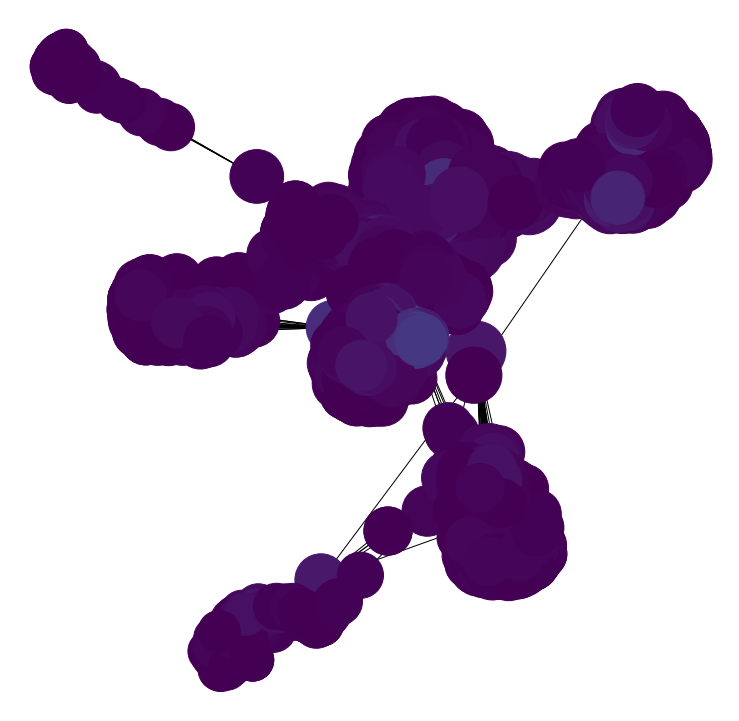

In [4]:
pos = nx.spring_layout(Grp1)
cloCent = nx.closeness_centrality(Grp1)
node_color = [20000.0 * Grp1.degree(v) for v in Grp1]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(Grp1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Nodes with highest shortest average path

In [5]:
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

[107, 58, 428, 563, 1684]

### Using Eeigenvector Centrality to find the important(influncer) nodes 

(-0.6283749943072885,
 1.0775416782559668,
 -0.5855516003838054,
 0.9675903555568476)

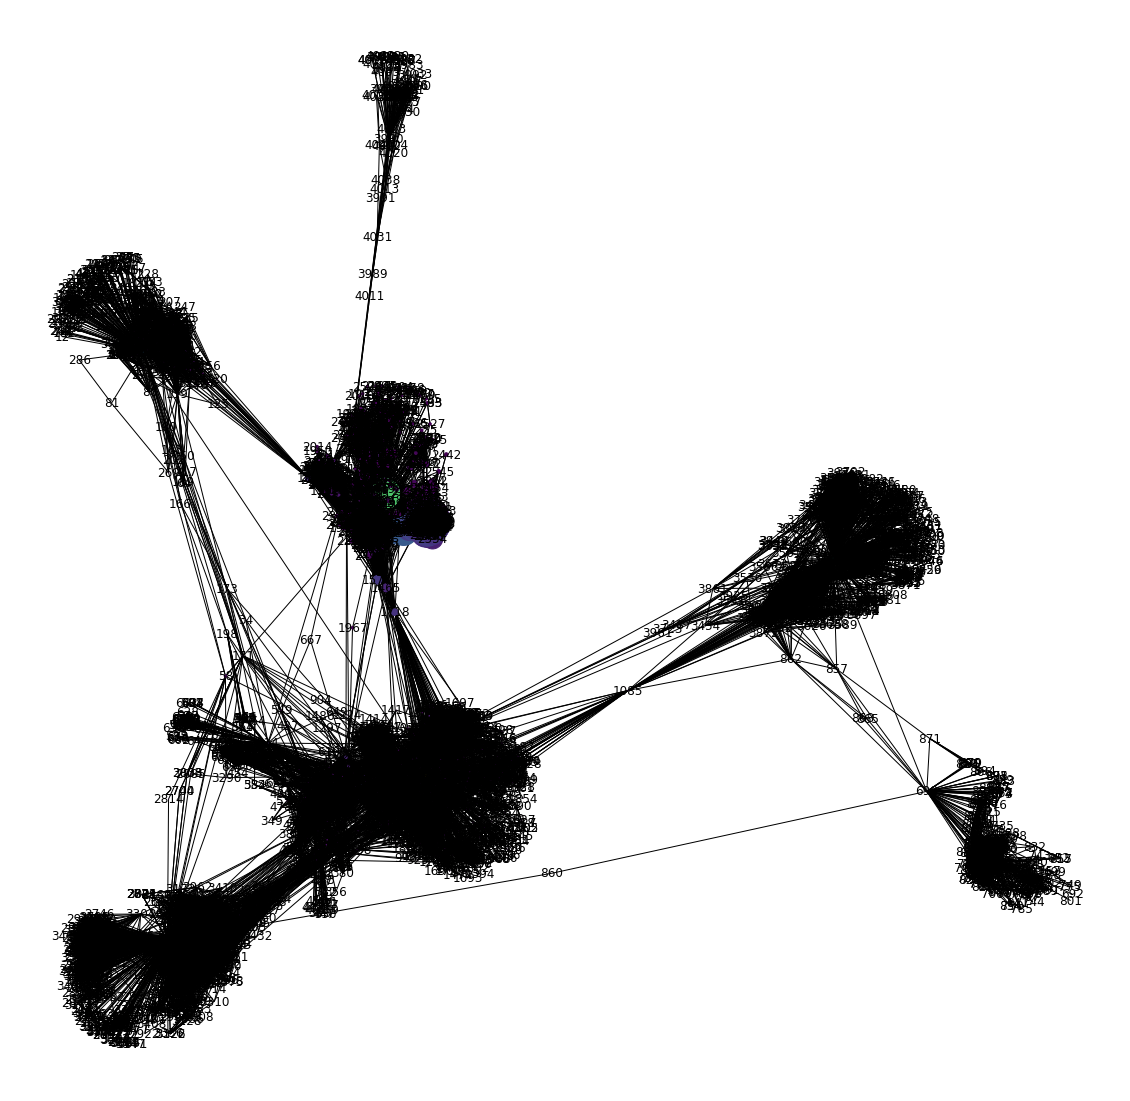

In [23]:
pos=nx.spring_layout(Grp1)
eigCent=nx.eigenvector_centrality(Grp1)
node_color=[20000.0*Grp1.degree(v) for v in Grp1]
node_size=[v*10000 for v in eigCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(Grp1, pos=pos, with_lables=False,node_color=node_color,node_size=node_size)
plt.axis('off')

Nodes with highest Eeigen Vectors

In [26]:
sorted(eigCent, key=eigCent.get, reverse=True)[:5]

[1912, 2266, 2206, 2233, 2464]